This is a code example from https://towardsdatascience.com/exploratory-data-analysis-tutorial-in-python-15602b417445 and has been adapted from the repository at: https://github.com/cbratkovics/sat_act_analysis

# Step 1: Import Libraries

In [1]:
import numpy as np                  # import numpy with the alias np
import pandas as pd                 # import pandas with the alias pd
import seaborn as sns               # import seaborn with the alias sns
import matplotlib.pyplot as plt     # import matplotlib.pyplot with the alias plt

# Set up backend of matplotlib to inline to view visuals in Jupyter Notebook.
%matplotlib inline

# Step 2: Load SAT and ACT Scores into Panads DataFrame

In [2]:
sat_17 = pd.read_csv('sat_act_data/sat_2017.csv')
sat_18 = pd.read_csv('sat_act_data/sat_2018.csv')
act_17 = pd.read_csv('sat_act_data/act_2017.csv')
act_18 = pd.read_csv('sat_act_data/act_2018.csv')
sat_17.name = 'SAT 2017'
sat_18.name = 'SAT 2018'
act_17.name = 'ACT 2017'
act_18.name = 'ACT 2018'

# Step 3: Check Dimensions of the Loaded DataFrames

In [3]:
print("SAT 2017 shape = ", sat_17.shape)
print("SAT 2018 shape = ", sat_18.shape)
print("ACT 2017 shape = ", act_17.shape)
print("ACT 2018 shape = ", act_18.shape)

SAT 2017 shape =  (51, 5)
SAT 2018 shape =  (51, 5)
ACT 2017 shape =  (52, 7)
ACT 2018 shape =  (53, 3)


There are 50 states plus D.C. in the United States. Therefore, we should have 51 rows in each DataFrame. It seems we need to clean up!

# Step 4: Check the Features Names and Types

First, let us peek at the first five rows of each data frame. This is done by invoking the "head" function on each data frame.

In [4]:
print(sat_17.head())
print(sat_18.head())
print(act_17.head())
print(act_18.head())

        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055
        State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076
      State Participation  English  Math  Reading  Science Composite
0  Nati

Next, let us look at the data types of the data frames. In Pandas, there are different object types such as: 1) object: text or mixed numeric and non-numeric values; 2) int64: integer numbers; 3) float64: floating point numbers; 4) bool: true/false values; 5) datetime64: date and time values; 6) timedelta[ns]: differences between two datetimes; 7) category: finite list of text values.

In [5]:
print("\tData Types of SAT 17:\n%s\n" % sat_17.dtypes)
print("\tData Types of SAT 18:\n%s\n" % sat_18.dtypes)
print("\tData Types of ACT 17:\n%s\n" % act_17.dtypes)
print("\tData Types of ACT 18:\n%s\n" % act_18.dtypes)

	Data Types of SAT 17:
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

	Data Types of SAT 18:
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

	Data Types of ACT 17:
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

	Data Types of ACT 18:
State            object
Participation    object
Composite        object
dtype: object



Let us focus on the ACT 17 data frame. Notice something interesting (Hint: the column named "Composite")?

In [6]:
print("\tData Types of ACT 17:\n%s\n" % act_17.dtypes)
print(act_17.head())

	Data Types of ACT 17:
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

      State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4


Some questions to consider before data cleanup: 1) Are the state names consistent? 2) Do the numbers make sense (> 0, no junk values, for percentages between 0 and 100, etc.)

# Step 5: Data Cleanup

For this exercise, we will just look at the composite/total scores and their relationship with participation rate in both ACT and SATs. We shall drop unnecessary columns before the start. Note that ACT 18 data frame just has composite score to begin with.

In [7]:
sat_17.drop(columns = ['Evidence-Based Reading and Writing', 'Math'], inplace = True)
sat_18.drop(columns = ['Evidence-Based Reading and Writing', 'Math'], inplace = True)
act_17.drop(columns = ['English', 'Math', 'Reading', 'Science'], inplace = True)

## Step 5.1: Cleanup of Scores.

Let us figure out the number of distinct ACT composite scores in 2017. In order to do this, sub-select the data frame "act_17" just for the column name "Composite" and perform "value_counts". The flag "ascending=False" means that the count is sorted from highest to lowest.

In [8]:
act_17['Composite'].value_counts(ascending=False)

20.3     3
21.4     3
19.8     3
20.4     2
21.9     2
24.2     2
19.7     2
24.1     2
21.8     2
23.6     2
19.4     2
21.5     1
19.1     1
20.8     1
25.4     1
20.2x    1
20.7     1
25.5     1
18.7     1
18.6     1
22.3     1
24.3     1
24.0     1
25.2     1
19.2     1
20.5     1
21.7     1
19.0     1
19.5     1
22.8     1
22.0     1
21.0     1
17.8     1
22.6     1
23.8     1
23.7     1
20.0     1
23.9     1
Name: Composite, dtype: int64

Note that we need to clean up one of the values "20.2x" (extraneous "x"). We can simply do this by applying a lambda function on the column and re-assigning it to the same column.

In [9]:
act_17['Composite'] = act_17['Composite'].apply(lambda x_cell: x_cell.strip('x'))

Now let us take a look at the 2018 ACT composite scores.

In [10]:
act_18['Composite'].value_counts(ascending=False)

23.9     3
20       3
20.3     3
19.2     2
24.2     2
19.4     2
21.3     2
22.5     2
24       2
19.1     2
20.8     1
19.3     1
20.1     1
22.7     1
19.6     1
22.3     1
18.6     1
17.7     1
20.7     1
25.5     1
23.6     1
18.3     1
21.4     1
20.2     1
21.9     1
23.7     1
21.8     1
24.1     1
23.8     1
18.9     1
20.4     1
25.6     1
24.5     1
19.9     1
21.6     1
22.2     1
#REF!    1
23.5     1
25.1     1
20.5     1
Name: Composite, dtype: int64

Note that there is another row whose composite score column is a junk value ("#REF!"). How can we get rid of this row? First of all, let us find it! For this, we can use Pandas.DataFrame.loc which locates a group of rows and columns by labels or a boolean array.

In [11]:
act_18.loc[act_18['Composite'] == "#REF!"]

,State,Participation,Composite
23,National,50%,#REF!


The row number with the index 23 has "State" value equal to "National". This does not make sense since it is not a name of a U.S. state. Now let us get rid of this entire row!

In [12]:
act_18.drop(act_18.index[23], inplace=True)

Does "act_17" data frame have the same problem? It turns out the row number with the index 0 has this problem.

In [13]:
act_17[act_17['State'] == 'National']

,State,Participation,Composite
0,National,60%,21.0


Let us drop this row as well for act_17.

In [14]:
act_17.drop(act_17.index[0], inplace=True)

## Step 5.2 Reconciling State Names

Next, we have to see whether the state names are consistent across SAT and ACT scores. The following is the routine used for it.

In [15]:
def compare_values(act_col, sat_col):
    act_vals = []
    sat_vals = []
    
    for a_val in act_col:
        act_vals.append(a_val)
    for s_val in sat_col:
        sat_vals.append(s_val)
    
    print('Values in ACT only: ')
    for val_a in act_vals:
        if (val_a not in sat_vals):
            print(val_a)
            
    print('----------------------------')
        
    print('Values in SAT only: ')
    for val_s in sat_vals:
        if (val_s not in act_vals):
            print(val_s)

In [16]:
compare_values(act_18['State'], sat_18['State'])

Values in ACT only: 
Washington, D.C.
----------------------------
Values in SAT only: 
District of Columbia


In [17]:
compare_values(act_17['State'], sat_17['State'])

Values in ACT only: 
----------------------------
Values in SAT only: 


We see that for 2018, the Washington D.C. has two different values. We need to reconcile this. We can use the replace function to convert "Washington, D.C." -> "District of Columbia".

In [18]:
act_18['State'].replace({'Washington, D.C.': 'District of Columbia'}, inplace=True)

## Step 5.3: Cleanup Participation by Removing Percentage Signs

In [19]:
def fix_participation(column):
    return column.apply(lambda cells: cells.strip('%'))

In [20]:
act_17['Participation'] = fix_participation(act_17['Participation'])
act_18['Participation'] = fix_participation(act_18['Participation'])
sat_17['Participation'] = fix_participation(sat_17['Participation'])
sat_18['Participation'] = fix_participation(sat_18['Participation'])

## Step 5.4: Convert Numbers to Numeric Types.

In [21]:
print("\tData Types of SAT 17:\n%s\n" % sat_17.dtypes)
print("\tData Types of SAT 18:\n%s\n" % sat_18.dtypes)
print("\tData Types of ACT 17:\n%s\n" % act_17.dtypes)
print("\tData Types of ACT 18:\n%s\n" % act_18.dtypes)

	Data Types of SAT 17:
State            object
Participation    object
Total             int64
dtype: object

	Data Types of SAT 18:
State            object
Participation    object
Total             int64
dtype: object

	Data Types of ACT 17:
State            object
Participation    object
Composite        object
dtype: object

	Data Types of ACT 18:
State            object
Participation    object
Composite        object
dtype: object



In [22]:
def convert_to_float(df):
    features = [col for col in df.columns if col != 'State']
    df[features] = df[features].astype(float)
    return df

act_17 = convert_to_float(act_17)
sat_17 = convert_to_float(sat_17)
act_18 = convert_to_float(act_18)
sat_18 = convert_to_float(sat_18)

print("After conversion:\n\n")
print("\tData Types of SAT 17:\n%s\n" % sat_17.dtypes)
print("\tData Types of SAT 18:\n%s\n" % sat_18.dtypes)
print("\tData Types of ACT 17:\n%s\n" % act_17.dtypes)
print("\tData Types of ACT 18:\n%s\n" % act_18.dtypes)

After conversion:


	Data Types of SAT 17:
State             object
Participation    float64
Total            float64
dtype: object

	Data Types of SAT 18:
State             object
Participation    float64
Total            float64
dtype: object

	Data Types of ACT 17:
State             object
Participation    float64
Composite        float64
dtype: object

	Data Types of ACT 18:
State             object
Participation    float64
Composite        float64
dtype: object



What would have happened if we try to run the conversion right after loading the data?

## Step 5.5: Check for Duplicate Data

Recall that we have potentially duplicate rows. Let us find the shape of each data frame again:

In [23]:
print("SAT 2017 shape = ", sat_17.shape)
print("SAT 2018 shape = ", sat_18.shape)
print("ACT 2017 shape = ", act_17.shape)
print("ACT 2018 shape = ", act_18.shape)

SAT 2017 shape =  (51, 3)
SAT 2018 shape =  (51, 3)
ACT 2017 shape =  (51, 3)
ACT 2018 shape =  (52, 3)


We need to investigate ACT 2018 data frame. Let us see if we have any duplicate state names. Recall that value_counts returns a Pandas Series and we just need to select a subset whose count is not 1.

In [24]:
counts = act_18['State'].value_counts()
counts[counts != 1]

Maine    2
Name: State, dtype: int64

In [25]:
act_18[act_18['State'] == 'Maine']

,State,Participation,Composite
0,Maine,7.0,24.0
52,Maine,7.0,24.0


Since we found the duplicate, let us delete one of the rows.

In [26]:
act_18.drop(act_18.index[0], inplace=True)
print("SAT 2017 shape = ", sat_17.shape)
print("SAT 2018 shape = ", sat_18.shape)
print("ACT 2017 shape = ", act_17.shape)
print("ACT 2018 shape = ", act_18.shape)

SAT 2017 shape =  (51, 3)
SAT 2018 shape =  (51, 3)
ACT 2017 shape =  (51, 3)
ACT 2018 shape =  (51, 3)


## Step 5.6: Check for Missing Data

In [27]:
print("\tSAT 2017 null count:\n%s\n" % sat_17.isnull().sum())
print("\tSAT 2018 null count:\n%s\n" % sat_18.isnull().sum())
print("\tACT 2017 null count:\n%s\n" % act_17.isnull().sum())
print("\tACT 2018 null count:\n%s\n" % act_18.isnull().sum())

	SAT 2017 null count:
State            0
Participation    0
Total            0
dtype: int64

	SAT 2018 null count:
State            0
Participation    0
Total            0
dtype: int64

	ACT 2017 null count:
State            0
Participation    0
Composite        0
dtype: int64

	ACT 2018 null count:
State            0
Participation    0
Composite        0
dtype: int64



## Step 5.7: Sort DataFrames by State

In [28]:
sat_17.sort_values(by=['State'], inplace=True)
sat_17 = sat_17.reset_index(drop=True)
sat_18.sort_values(by=['State'], inplace=True)
sat_18 = sat_18.reset_index(drop=True)
act_17.sort_values(by=['State'], inplace=True)
act_17 = act_17.reset_index(drop=True)
act_18.sort_values(by=['State'], inplace=True)
act_18 = act_18.reset_index(drop=True)

## Step 5.8: Merge Necessary Data Frames for Analysis

In [29]:
# rename the 2017 SAT columns
sat_17.rename(columns={
    'State':'state',
    'Participation':'sat_participation_17',
    'Total':'sat_score_17'
    }, inplace=True)

# rename the 2018 SAT columns
sat_18.rename(columns={
    'State':'state',
    'Participation':'sat_participation_18',
    'Total':'sat_score_18'
    }, inplace=True)

# rename the 2017 ACT columns
act_17.rename(columns={
    'State':'state',
    'Participation':'act_participation_17',
    'Composite':'act_composite_17'
}, inplace=True)

# rename the 2018 ACT columns
act_18.rename(columns={
    'State':'state',
    'Participation':'act_participation_18',
    'Composite':'act_composite_18'
}, inplace=True)

In [31]:
sat_act_17 = pd.merge(sat_17, act_17, on = 'state', how='outer')
sat_act_17.name = 'SAT/ACT 2017'
sat_act_17.head()

,state,sat_participation_17,sat_score_17,act_participation_17,act_composite_17
0,Alabama,5.0,1165.0,100.0,19.2
1,Alaska,38.0,1080.0,65.0,19.8
2,Arizona,30.0,1116.0,62.0,19.7
3,Arkansas,3.0,1208.0,100.0,19.4
4,California,53.0,1055.0,31.0,22.8


In [32]:
sat_act_18 = pd.merge(sat_18, act_18, on = 'state', how='outer')
sat_act_18 = sat_act_18.reset_index(drop=True)
sat_act_18.head()

,state,sat_participation_18,sat_score_18,act_participation_18,act_composite_18
0,Alabama,6.0,1166.0,100.0,19.1
1,Alaska,43.0,1106.0,33.0,20.8
2,Arizona,29.0,1149.0,66.0,19.2
3,Arkansas,5.0,1169.0,100.0,19.4
4,California,60.0,1076.0,27.0,22.7


In [34]:
df = pd.merge(sat_act_17, sat_act_18, on = 'state', how='outer')
df.head()

,state,sat_participation_17,sat_score_17,act_participation_17,act_composite_17,sat_participation_18,sat_score_18,act_participation_18,act_composite_18
0,Alabama,5.0,1165.0,100.0,19.2,6.0,1166.0,100.0,19.1
1,Alaska,38.0,1080.0,65.0,19.8,43.0,1106.0,33.0,20.8
2,Arizona,30.0,1116.0,62.0,19.7,29.0,1149.0,66.0,19.2
3,Arkansas,3.0,1208.0,100.0,19.4,5.0,1169.0,100.0,19.4
4,California,53.0,1055.0,31.0,22.8,60.0,1076.0,27.0,22.7


# Step 6: Analysis

Basic statistics on the data frame can be performed by calling "describe" on it.

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_score_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat_participation_18,51.0,45.745098,37.314256,2.0,4.50,52.0,77.50,100.0
sat_score_18,51.0,1120.019608,94.155083,977.0,1057.50,1098.0,1204.00,1298.0
act_participation_18,51.0,61.725490,34.037085,7.0,28.50,66.0,100.00,100.0
act_composite_18,51.0,21.496078,2.111583,17.7,19.95,21.3,23.65,25.6


## Step 6.1: Correlation Analysis

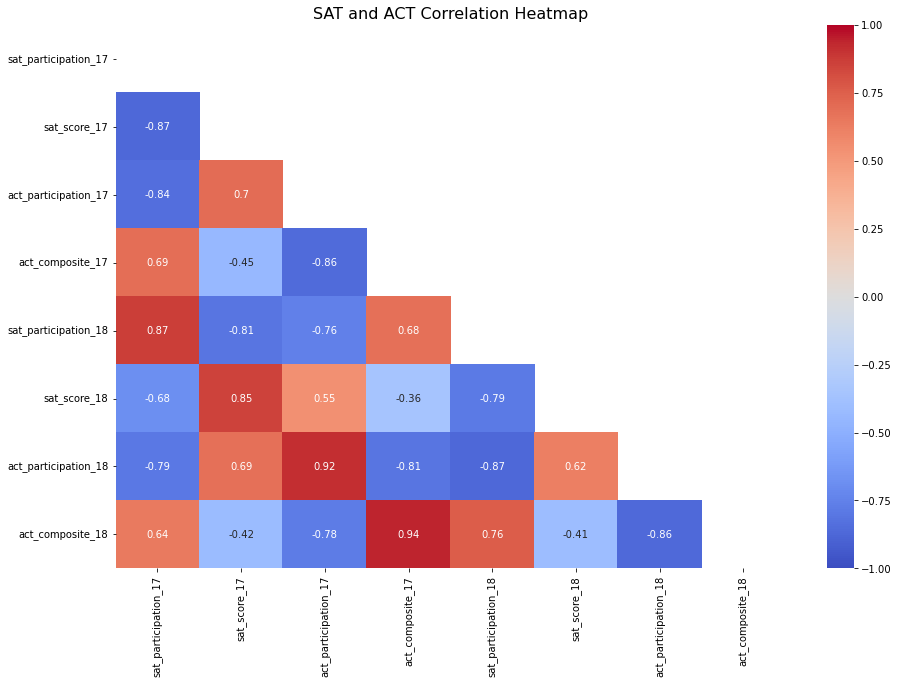

In [37]:
plt.figure(figsize = (15,10))
plt.title('SAT and ACT Correlation Heatmap', fontsize = 16);

# Mask to remove redundancy from the heatmap.
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);

Let us just focus on the participation rates.

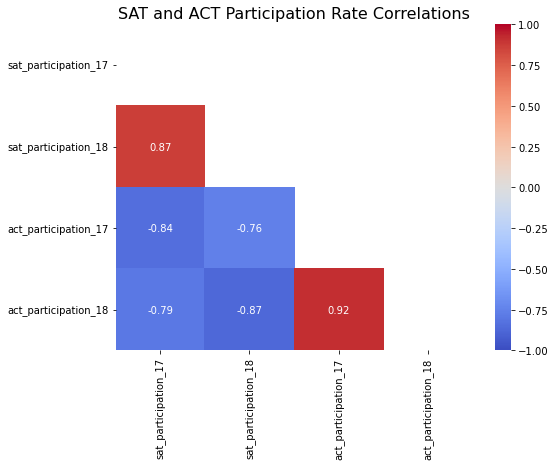

In [38]:
plt.figure(figsize = (8,6))
features = ['sat_participation_17', 'sat_participation_18', 'act_participation_17', 'act_participation_18']
plt.title('SAT and ACT Participation Rate Correlations', fontsize = 16);
mask = np.zeros_like(df[features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[features].corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);

Now just the scores.

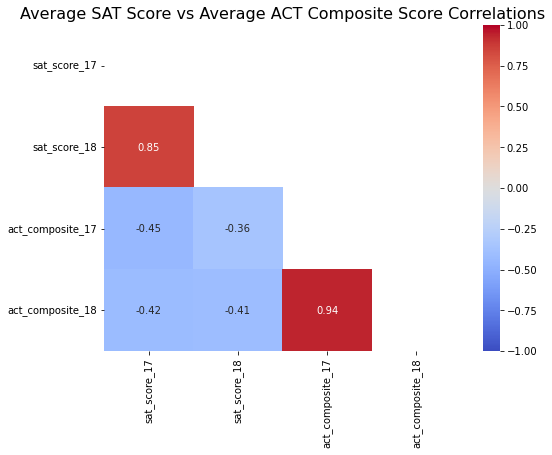

In [39]:
plt.figure(figsize = (8,6))
features = ['sat_score_17', 'sat_score_18', 'act_composite_17', 'act_composite_18']
plt.title('Average SAT Score vs Average ACT Composite Score Correlations', fontsize = 16);
mask = np.zeros_like(df[features].corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[features].corr(), mask=mask, vmin=-1, vmax = 1, cmap = "coolwarm",  annot = True);

## Step 6.2: Box Plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

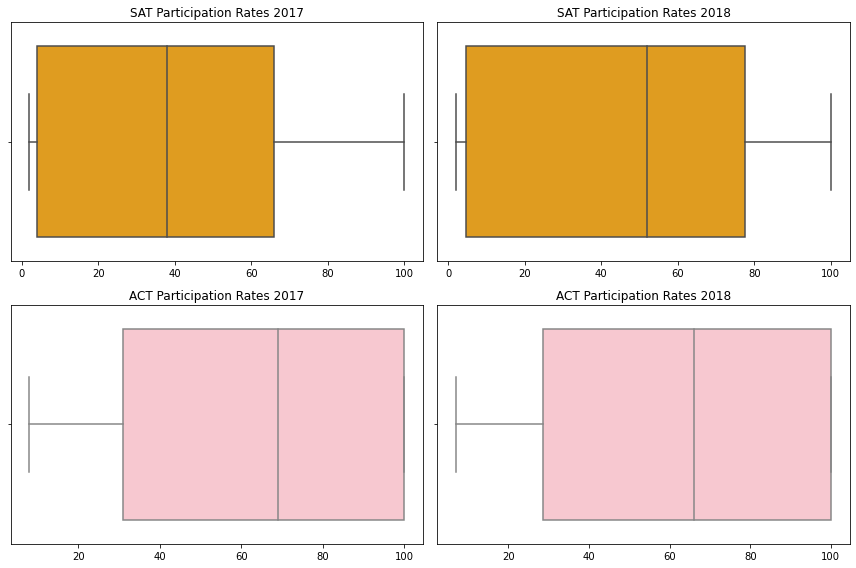

In [41]:
# Boxplots comparing the average participation rates of the 2017 ACT, 2018 ACT, 2017 SAT, and 2018 SAT.
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

sns.boxplot(df["sat_participation_17"], ax = ax[0,0], orient="h", color = 'orange').set(
    xlabel='', title='SAT Participation Rates 2017');

sns.boxplot(df["sat_participation_18"], ax = ax[0,1], orient="h", color = 'orange').set(
    xlabel='', title='SAT Participation Rates 2018');

sns.boxplot(df["act_participation_17"], ax = ax[1,0], orient="h", color= 'pink').set(
    xlabel='', title='ACT Participation Rates 2017');

sns.boxplot(df["act_participation_18"], ax = ax[1,1], orient="h", color = 'pink').set(
    xlabel='', title='ACT Participation Rates 2018');

plt.tight_layout()

In [ ]:
## Step 6.3: Histograms

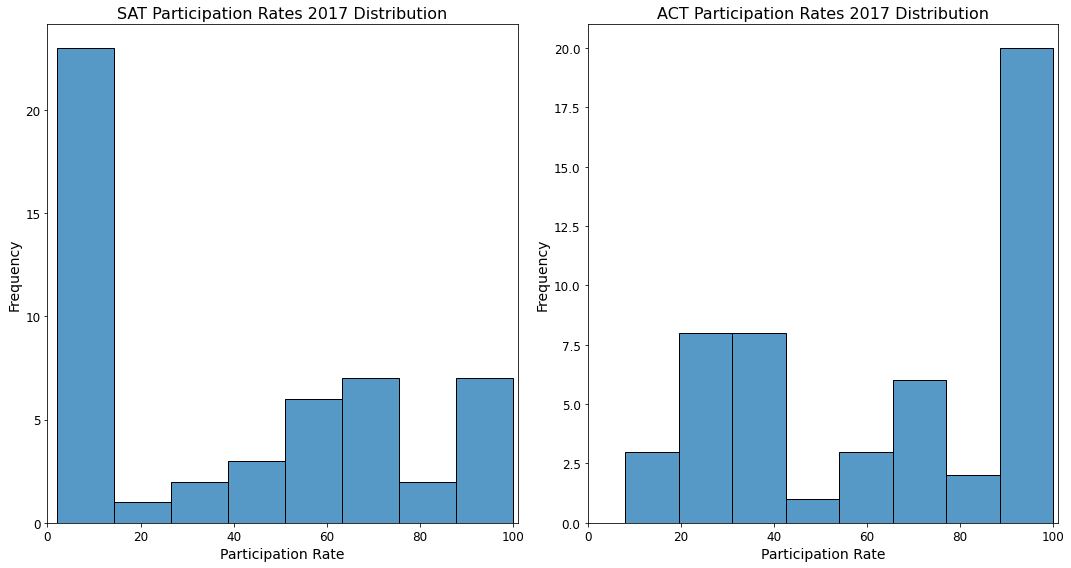

In [44]:
plt.figure(figsize = (15,8))

# SAT Participation Rates 2017 histogram
plt.subplot(1,2,1) 
sns.histplot(df.sat_participation_17, kde=False,bins=8);

plt.title('SAT Participation Rates 2017 Distribution', fontsize=16)
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ACT Participation Rates 2017 histogram
plt.subplot(1,2,2) 
sns.histplot(df.act_participation_17, kde=False, bins=8);

plt.title('ACT Participation Rates 2017 Distribution', fontsize=16)
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

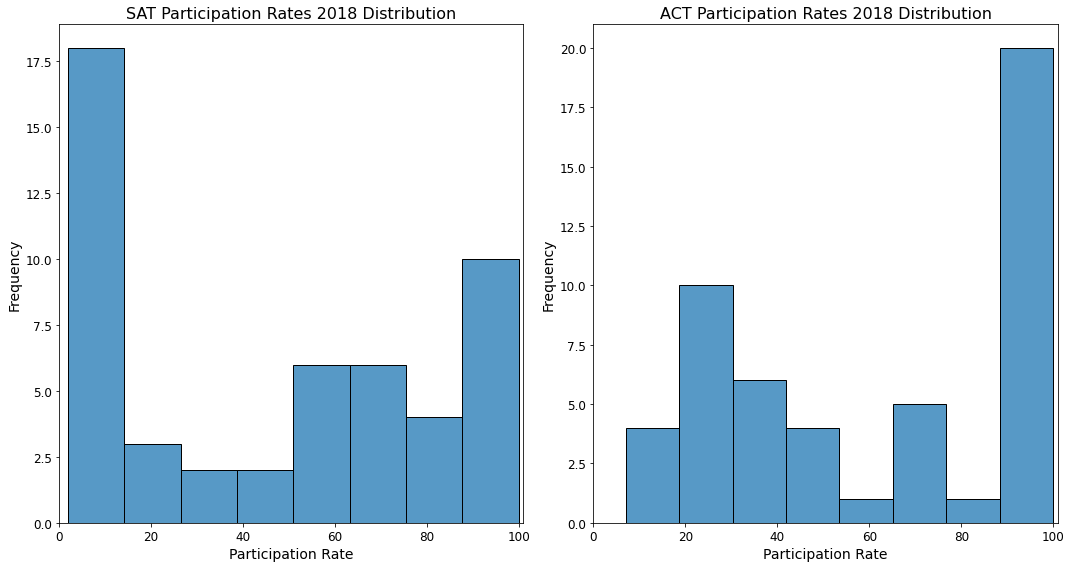

In [45]:
plt.figure(figsize = (15,8))

# SAT Participation Rates 2018 histogram
plt.subplot(1,2,1) 
sns.histplot(df.sat_participation_18, kde=False, bins=8);

plt.title('SAT Participation Rates 2018 Distribution', fontsize=16);
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ACT Participation Rates 2018 histogram
plt.subplot(1,2,2) 
sns.histplot(df.act_participation_18,kde=False,bins=8);
plt.title('ACT Participation Rates 2018 Distribution', fontsize=16);
plt.xlabel('Participation Rate', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, 101)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()